# Proyek Analisis Data: Air Quality
- **Nama:** Nurkahfi Amran Rahmada
- **Email:** nurkahfirahmada@gmail.com
- **ID Dicoding:** nurkahfirahmada

## Menentukan Pertanyaan Bisnis

- Bagaimana Kualitas Udara Pada Masing-masing Daerah Pada Tahun Sebelumnya?
- Apa Hubungan Antara Kualitas Udara dengan Temperature?
- Bagaimana Unsur Pollutant Dapat Mempengaruhi Kualitas Udara?
- Apa Perbedaan Kualitas Udara Pada Malam Hari dan Siang Hari?
- Apakah Curah Hujan yang Tinggi Mempengaruhi Kualitas Udara?

## Import Semua Packages/Library yang Digunakan

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

## Data Wrangling

### Gathering Data

Sebelum melakukan import data menjadi Dataframe, terlebih dahulu saya melakukan renaming pada file-file data dari `"PRSA_Data_(nama kota)_20130301-20170228.csv"` menjadi `"PRSA_Data_(nama kota).csv"`. Tujuannya adalah untuk mempermudah dalam melakukan import file.

In [37]:
directory = "data/"

file_names = os.listdir(directory)

print(file_names)

['PRSA_Data_Aotizhongxin.csv', 'PRSA_Data_Changping.csv', 'PRSA_Data_Dingling.csv', 'PRSA_Data_Dongsi.csv', 'PRSA_Data_Guanyuan.csv', 'PRSA_Data_Gucheng.csv', 'PRSA_Data_Huairou.csv', 'PRSA_Data_Nongzhanguan.csv', 'PRSA_Data_Shunyi.csv', 'PRSA_Data_Tiantan.csv', 'PRSA_Data_Wanliu.csv', 'PRSA_Data_Wanshouxigong.csv']


Setelah mendapatkan list-list file dari directory data, selanjutnya kita mengaplikasikan regular expression untuk melakukan renaming pada file dengan bantuan module os.

In [38]:
pattern = r"_20130301-20170228"

for old_name in file_names:
    new_name = re.sub(pattern, r"", old_name)
    
    print(new_name)
    
    if old_name == new_name:
        continue
    
    os.rename(directory + old_name, directory + new_name)

PRSA_Data_Aotizhongxin.csv
PRSA_Data_Changping.csv
PRSA_Data_Dingling.csv
PRSA_Data_Dongsi.csv
PRSA_Data_Guanyuan.csv
PRSA_Data_Gucheng.csv
PRSA_Data_Huairou.csv
PRSA_Data_Nongzhanguan.csv
PRSA_Data_Shunyi.csv
PRSA_Data_Tiantan.csv
PRSA_Data_Wanliu.csv
PRSA_Data_Wanshouxigong.csv


Setelah file-file di rename, selanjutnya import data ke dalam Dataframe untuk mengetahui jenis data yang sudah kita kumpulkan.

In [39]:
example_df = pd.read_csv("data/PRSA_Data_Dingling.csv")

example_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [40]:
example_df = pd.read_csv('data/PRSA_Data_Aotizhongxin.csv')

example_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**

Dari dua contoh data diatas, dapat disimpulkan bahwa setiap data memiliki kolom yang sama. 
- Terdapat data waktu (Tahun, Bulan, Hari, Jam) kapan data tersebut diambil
- Terdapat kolom yang berisi kandungan suatu unsur dalam udara (PM2.5, PM10, SO2, NO2, CO, O3)
- Terdapat data temperature lingkungan dan tekanan atmosfer (TEMP, PRES)
- Terdapat data titik embun dan curah hujan (DEWP, RAIN)
- Terdapat data yang berisi arah angin dan kecepatannya (wd, WSPM)

### Data Understanding

Sebelum masuk ke dalam tahap assessing data, saya terlebih dahulu akan memahami setiap kolom pada data. Tujuannya agar membantu saya memahami data yang saya analisis.

* **year** : Tahun pengambilan data

* **month** : Bulan pengambilan data

* **day** : Tanggal pengambilan data
* **hour** : Jam pemgambilan data
* **PM2.5** : Konsentrasi partikel udara yang berdiameter kurang dari 2.5 mikrometer (biasanya dinyatakan dalam mikrogram per meter kubik). PM2.5 dapat berdampak buruk pada kesehatan karena partikel-partikel ini dapat masuk jauh ke dalam paru-paru.
* **PM10** : Konsentrasi partikel udara yang berdiameter kurang dari 10 mikrometer (juga dalam mikrogram per meter kubik). Partikel ini juga bisa menimbulkan masalah kesehatan tetapi cenderung lebih sedikit dibanding PM2.5.
* **SO2** : Konsentrasi sulfur dioksida di udara (biasanya dalam mikrogram per meter kubik). Gas ini merupakan polutan yang dihasilkan dari pembakaran bahan bakar fosil.
* **NO2** : Konsentrasi nitrogen dioksida di udara (mikrogram per meter kubik). NO2 merupakan gas polutan yang sering dihasilkan dari emisi kendaraan bermotor dan pembakaran industri.
* **CO** : Konsentrasi karbon monoksida (biasanya dalam miligram per meter kubik). Gas ini berbahaya jika dihirup dalam jumlah besar dan sering berasal dari pembakaran tidak sempurna.
* **O3** : Konsentrasi ozon (mikrogram per meter kubik). Ozon di permukaan bumi adalah polutan yang dapat berdampak negatif pada kesehatan, terutama pada sistem pernapasan.
* **TEMP** : Suhu lingkungan saat pengambilan data (biasanya dalam derajat Celsius).
* **PRES** : Tekanan atmosfer (biasanya dalam hPa atau milibar).
* **DEWP** : Titik embun, yaitu suhu di mana udara mulai mengembun dan terbentuk uap air (biasanya dalam derajat Celsius).
* **RAIN** : Curah hujan (biasanya dalam milimeter) yang tercatat pada jam tersebut.
* **wd** : Arah angin, biasanya direpresentasikan dengan simbol (misalnya N, E, S, W).
* **WSPM** : Kecepatan angin (dalam meter per detik).
* **station** : Nama atau kode dari stasiun pengukuran yang mengumpulkan data ini.

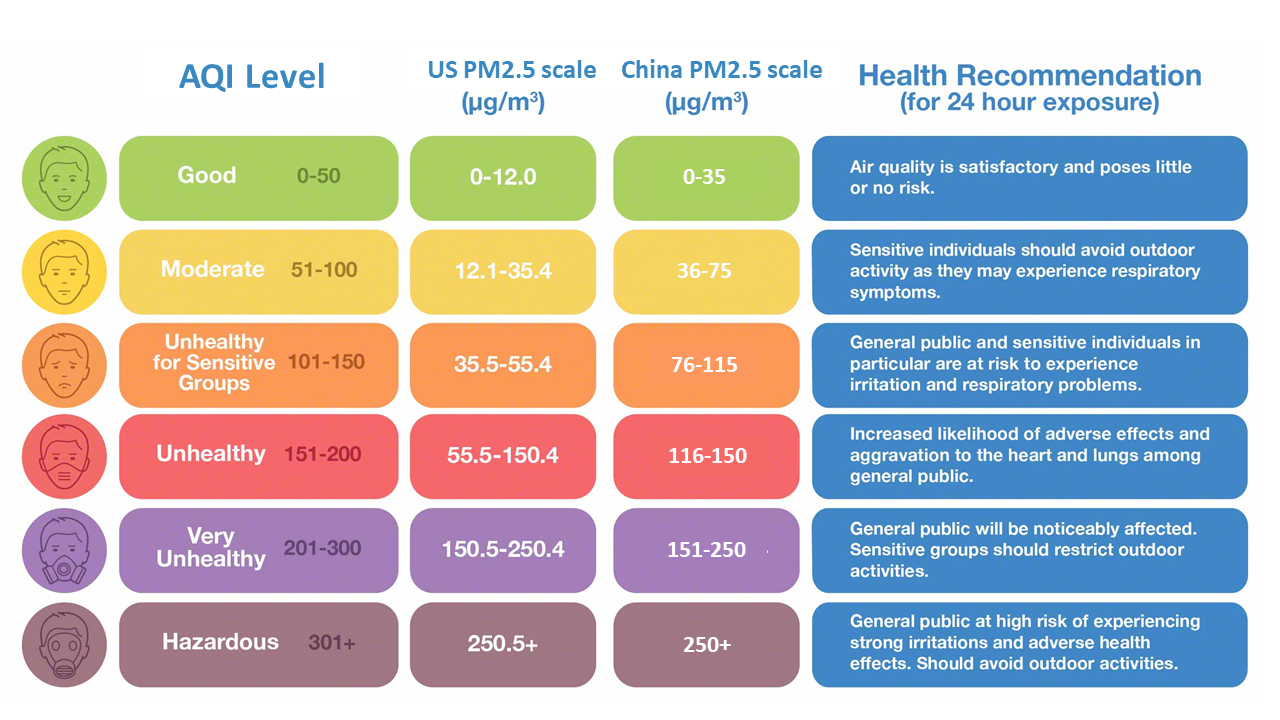

Dari tabel diatas, dapat diketahui bahwa kualitas udara (PM2.5) yang masih dapat dihirup berada pada rentang 0 - 100. Sedangkan untuk kualitas udara (PM2.5) diatas 300 (250 untuk standar China) sangat berbahaya bagi manusia. (Sumber : https://www.iqair.com/id/newsroom/how-to-monitor-outdoor-air-quality)

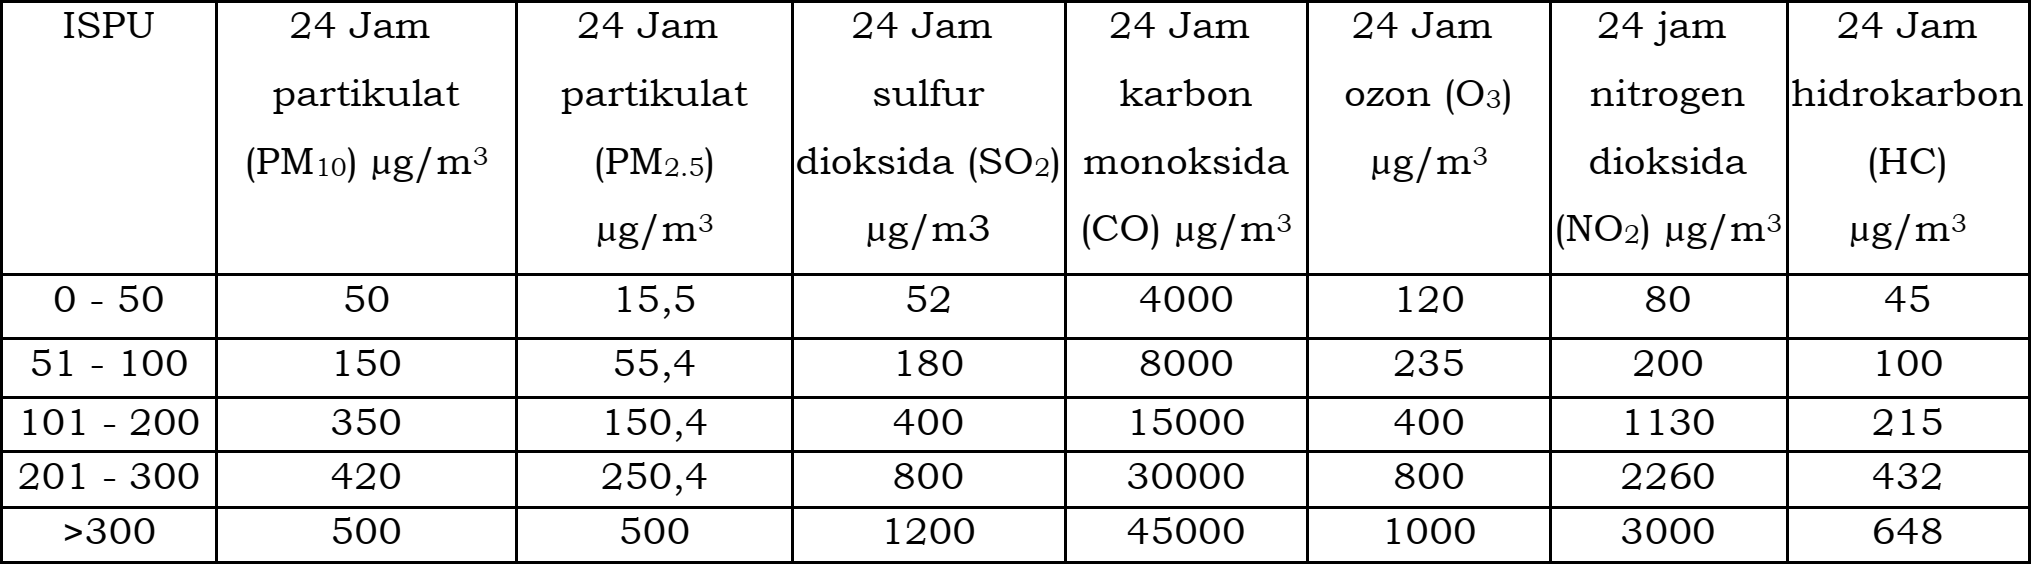

Ada tabel lain yang juga menunjukan kandungan pollutant pada udara sesuai dengan rentang ISPU nya. (Sumber : https://www.climate4life.info/2021/03/regulasi-terbaru-perhitungan-ispu.html)

### Assessing Data

Setelah memahami data yang akan analisis, selanjutnya saya akan menilai kualitas dari data. Untuk menghemat waktu dan tenaga, proses assessing data akan saya lakukan sekaligus dalam satu code block menggunakan bantuan for loop.

Pertama, kita akan cek duplikat dari masing-masing data.

In [41]:
for data in file_names:    
    df = pd.read_csv(directory + data)
    
    print(data)
    print(df.duplicated().sum())
    print()

PRSA_Data_Aotizhongxin.csv
0

PRSA_Data_Changping.csv
0

PRSA_Data_Dingling.csv
0

PRSA_Data_Dongsi.csv
0

PRSA_Data_Guanyuan.csv
0

PRSA_Data_Gucheng.csv
0

PRSA_Data_Huairou.csv
0

PRSA_Data_Nongzhanguan.csv
0

PRSA_Data_Shunyi.csv
0

PRSA_Data_Tiantan.csv
0

PRSA_Data_Wanliu.csv
0

PRSA_Data_Wanshouxigong.csv
0



**Insight:**
- Tidak ada data yang memiliki data duplikat didalamnya.

Selanjutnya akan dilihat parameter statistik pada masing-masing data

In [42]:
for data in file_names:
    df = pd.read_csv(directory + data)

    print(data)
    print(df.describe())
    print()

PRSA_Data_Aotizhongxin.csv
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     

**Insight:**
- Nilai rata-rata dan nilai maksimum pada kolom PM2.5 dan PM10 sangat jauh berbeda. Kolom tersebut juga memiliki nilai yang tidak masuk akal yaitu 900+. 
- Untuk kolom unsur pollutant (SO2, NO2, CO, O3) masih di rentang yang normal apabila dilihat dari tahap data understanding. Akan tetapi nilai rata-rata dan maksimum masih tetap jauh dengan standar deviasi yang terkategori kecil.
- Hal ini juga memungkinkan adanya invalid value, inaccurate value, atau inconsistent value

Dari sini, saya akan mengobservasi sebaran data dengan menggunakan boxplot.

In [43]:
numerical = [df.select_dtypes(exclude='object').columns][0][5:]

numerical

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM'],
      dtype='object')

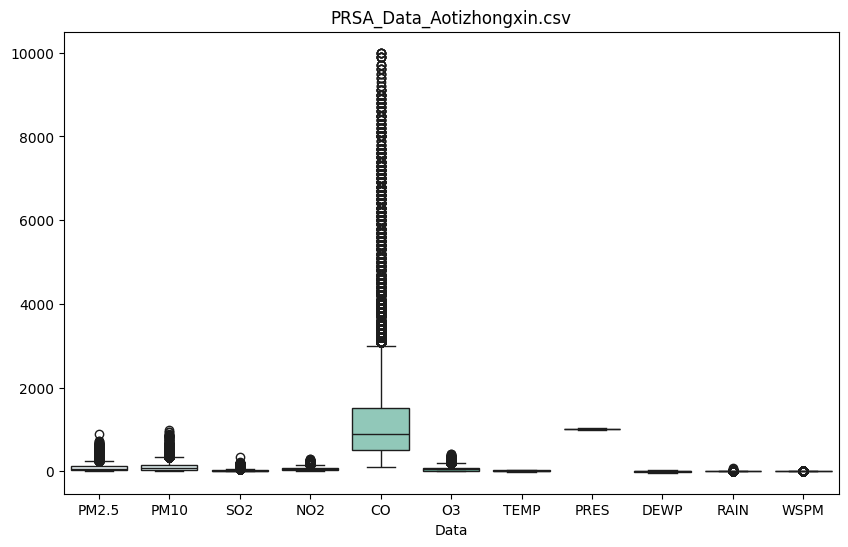

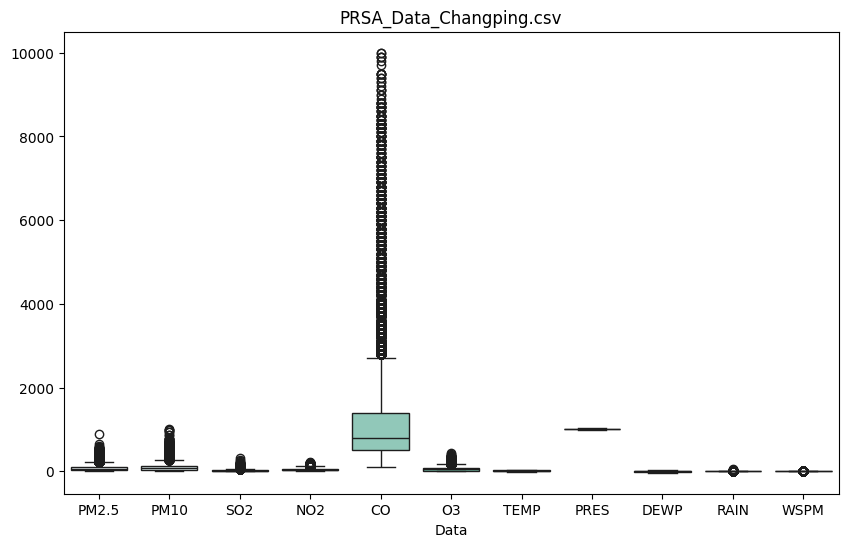

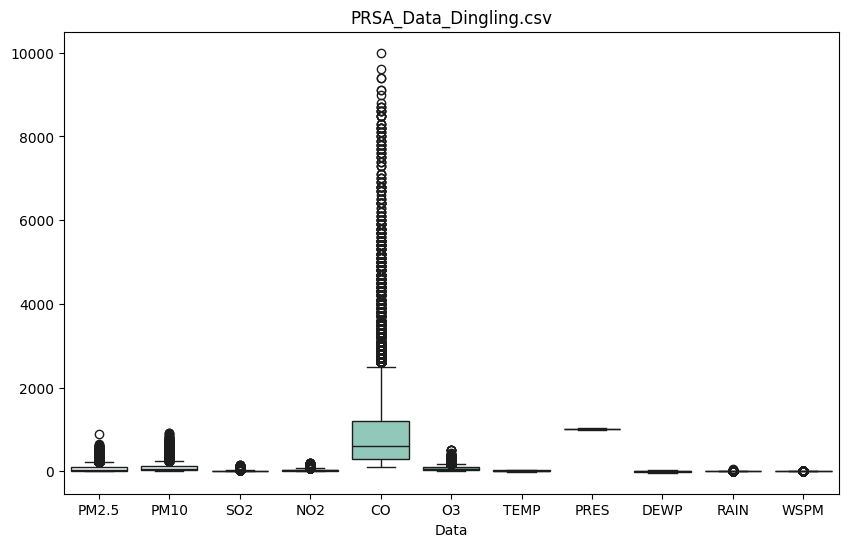

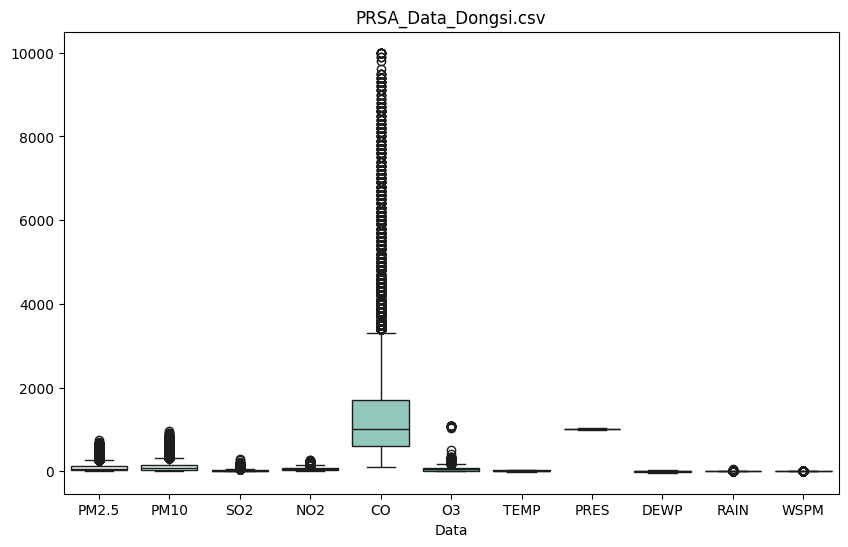

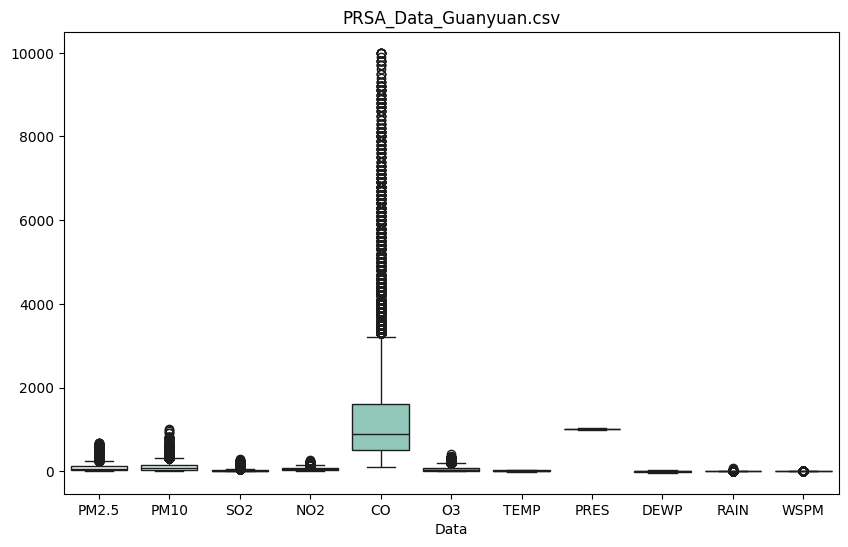

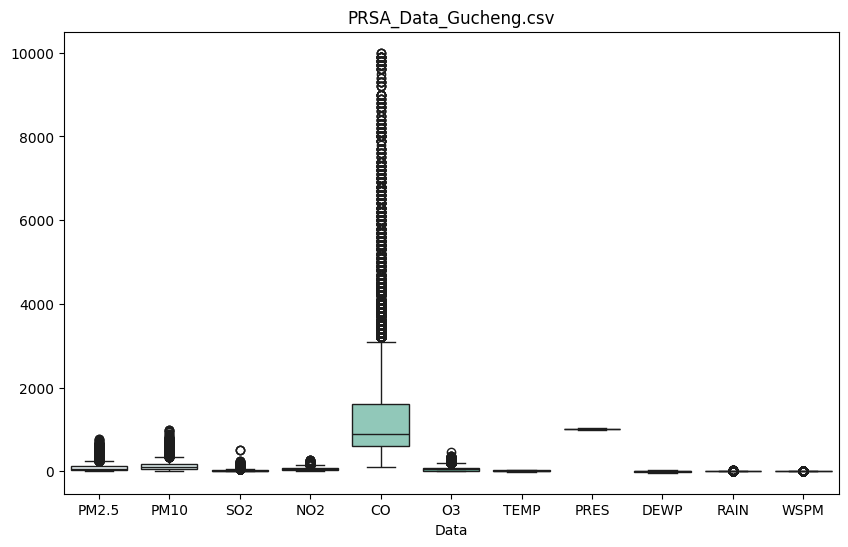

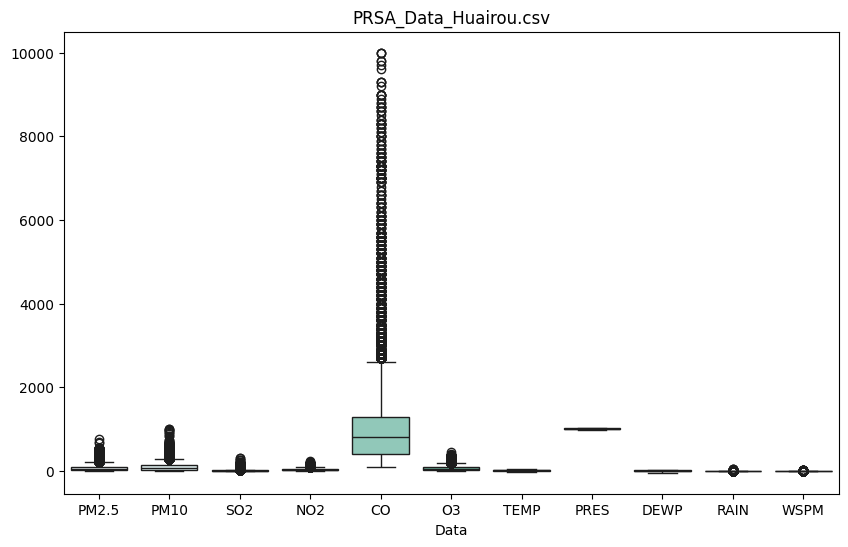

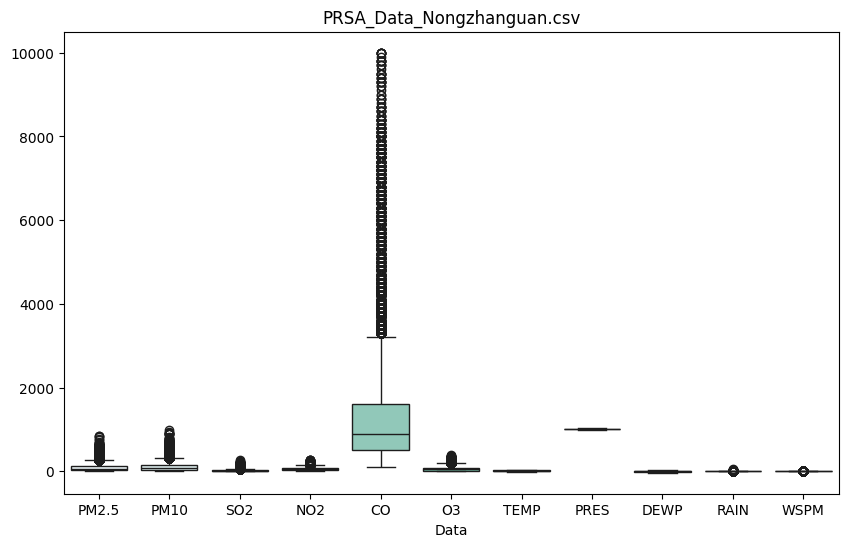

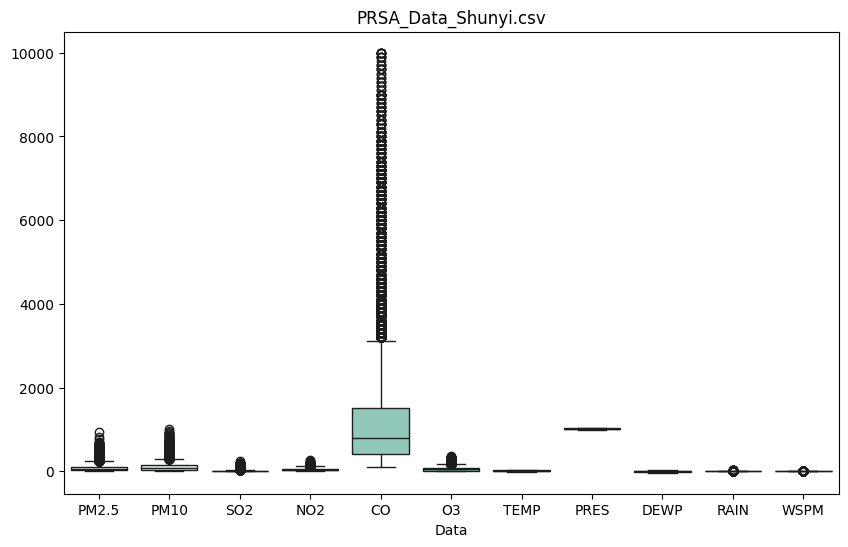

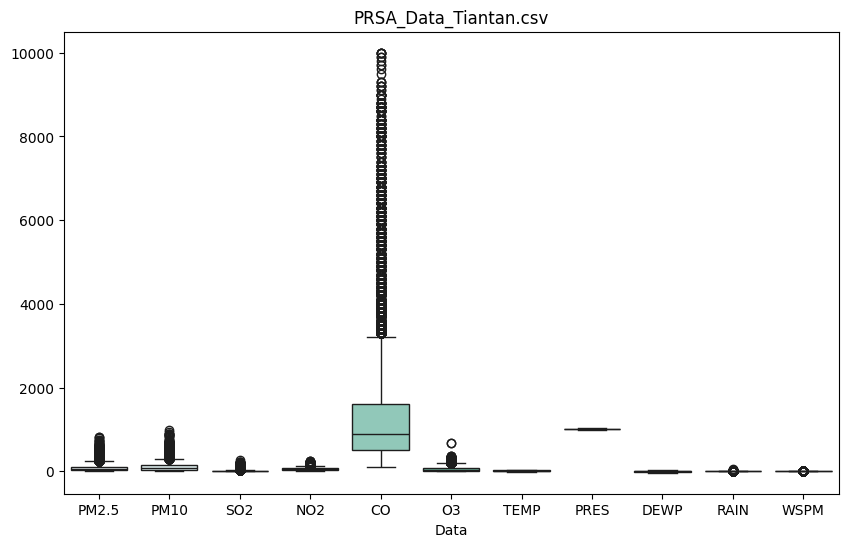

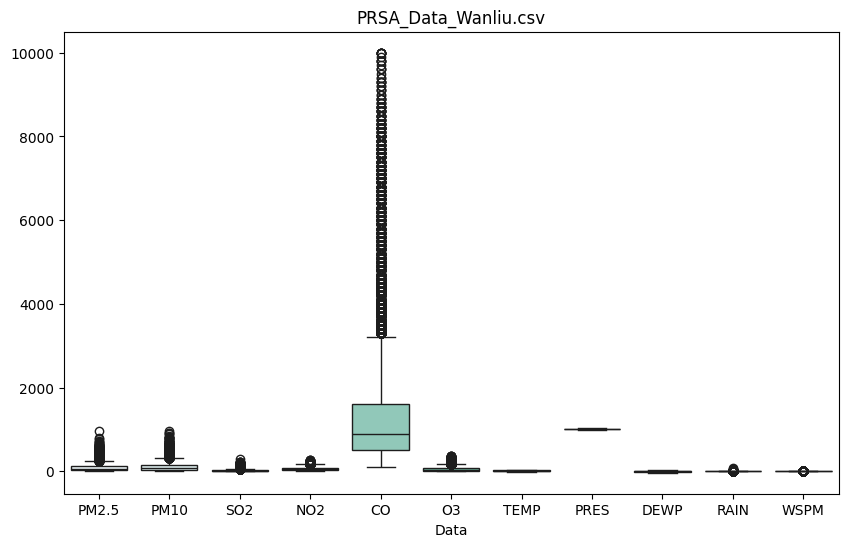

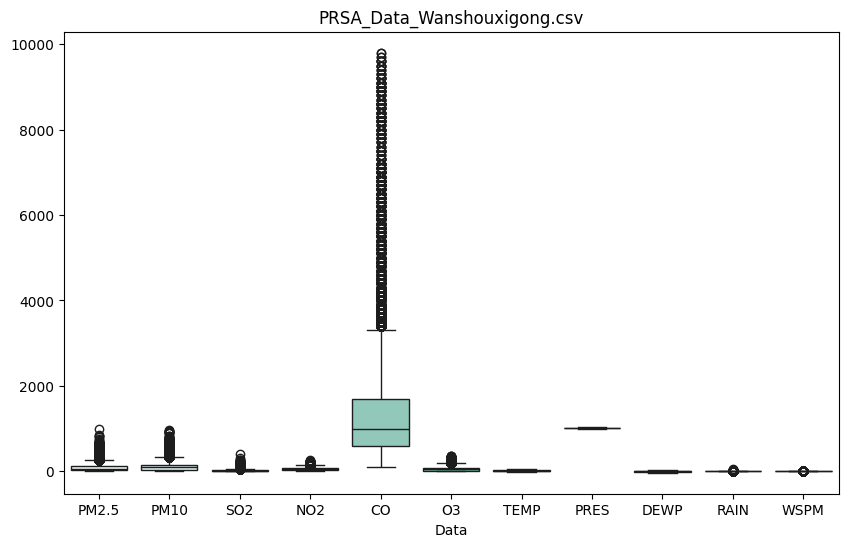

In [44]:
for file in file_names:
    df = pd.read_csv(directory + file)

    # Membuat box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[numerical], palette='BuGn')
    plt.title(file)
    plt.xlabel("Data")
    plt.show()
    
    print()

**Insight:**
- Banyak data yang diluar dari cut off value (IQR * 1.5)
- Strategi yang dapat diterapkan adalah mengganti nilai yang melebihi cut off value dengan menggunakan interpolasi linear, agar pattern yang dibentuk sesuai dengan keadaan dari waktu sebelumnya.

Selanjutnya akan diobservasi jumlah missing values pada masing-masing data.

In [45]:
for data in file_names:
    df = pd.read_csv(directory + data)

    print(data)
    print(df.isna().sum())
    print()

PRSA_Data_Aotizhongxin.csv
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

PRSA_Data_Changping.csv
No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

PRSA_Data_Dingling.csv
No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

PRSA_Data_Dongsi.csv

**Insight:**
- Setiap data memiliki kolom dengan jumlah missing values yang banyak.
- Strategi yang dapat dilakukan untuk kolom numerikal (PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM) adalah dengan mengisi missing values menggunakan interpolasi linear. Metode interpolasi akan mengisi missing values dengan menggunakan interpolasi nilai sebelum dan sesudahnya. Saya mengadposi teknik interpolasi karena data termasuk time series (berurutan waktu).
- Strategi yang dapat diambil untuk kolom kategorikal (wd) adalah dengan forward fill. Metode forward fill akan mengisi data dengan data sebelumnya. Saya mengadposi teknik ini karena data akan menjadi tidak masuk akal apabila diisi dengan nilai modul maupun median.


### Cleaning Data

Setelah proses assessing data selesai, selanjutnya saya akan melakukan cleaning pada data sesuai dengan strategi-strategi yang sudah saya siapkan ditahap sebelumnya

In [46]:
pattern = r"\w+_\w+_(\w+)"
names = []
df_dict = {}

for name in file_names:
    df = pd.read_csv(directory + name)
    result = re.search(pattern, name)
    
    df_dict[result[1]] = df
    names.append(result[1])

Pertama saya akan mengganti nilai outlier dengan metode interpolasi linear. Langkah pertama saya akan mengganti nilai yang diluar dari cut off value menjadi NaN (null), lalu menggantinya dengan hasil interpolasi bersamaan dengan mengisi missing values pada data.

In [47]:
for name in names:
    df = df_dict[name]

    for col in numerical:
        if col == "RAIN":
            continue
        
        Q1 = (df[col]).quantile(0.25)
        Q3 = (df[col]).quantile(0.75)
        IQR = Q3 - Q1
        
        max = Q3 + (1.5 * IQR)
        min = Q1 - (1.5 * IQR)            
        
        outliers = (df[col] < min) | (df[col] > max)
        
        df.loc[outliers, col] = np.nan        

In [48]:
for name in names:
    df = df_dict[name]
    
    for col in numerical:
        df[col] = df[col].interpolate()

In [49]:
for name in names:
    df = df_dict[name]

    df['wd'] = df['wd'].ffill()

In [50]:
for name in names:
    df = df_dict[name]

    print(name)
    print(df.isna().sum())
    print()

Aotizhongxin
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       3
station    0
dtype: int64

Changping
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dingling
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        2
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dongsi
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM     

Masih ada baris data yang memiliki missing values, biasanya untuk kasus interpolasi terdapat pada baris pertama yang Null. Untuk mengatasi ini saya akan menggunakan strategi Imputaion dengan nilai mean.

In [51]:
for name in names:
    df = df_dict[name]

    for col in numerical:
        df[col] = df[col].fillna(df[col].mean())

In [52]:
for name in names:
    df = df_dict[name]

    print(name)
    print(df.isna().sum())
    print()

Aotizhongxin
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Changping
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dingling
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dongsi
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM     

Setelah missing values sudah dihandle, selanjutnya kita akan evaluasi hasil dari perubahan data. Terutama kolom PM2.5 dan PM10

In [53]:
for name in names:
    df = df_dict[name]

    print(name)
    print(df.describe())
    print()

Aotizhongxin
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      76.376138    105.107134     14.254578     58.464466   1098.932124   
std       64.799650     80.251791     

**Insight:**
- Dari hasil cleaning data, kolom PM2.5 dan PM10 sudah memiliki rentang yang normal dengan data maksimal mayoritas di <300. Setelah ini kita dapat melakukan analisis dengan nilai data yang lebih realistis.

## Exploratory Data Analysis (EDA)

### Explore Pertanyaan 1

In [54]:
for name in names:
    df = df_dict[name]

    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [77]:
for name in names:
    df = df_dict[name]

    observe = df.groupby(by=['year', 'month']).agg({
        'PM2.5' : 'mean',
        'PM10' : 'mean'
    }).reset_index()
    
    print(name)
    print(observe[(observe['year'] == 2016)])
    print()

Aotizhongxin
    year  month       PM2.5        PM10
34  2016      1   63.743280   82.832661
35  2016      2   38.892960   55.170259
36  2016      3   82.211022  147.140457
37  2016      4   71.098611  111.991667
38  2016      5   53.125000   73.049731
39  2016      6   57.298611   71.218750
40  2016      7   71.142473   76.397177
41  2016      8   46.256720   49.309812
42  2016      9   55.826389   68.502083
43  2016     10   83.898522   99.446909
44  2016     11   95.835417  123.049306
45  2016     12  110.362832  132.743846

Changping
    year  month      PM2.5        PM10
34  2016      1  52.803763   77.942876
35  2016      2  35.193247   54.485632
36  2016      3  64.016129  113.008995
37  2016      4  56.711806  100.619177
38  2016      5  50.526344   76.943280
39  2016      6  52.906806   67.348889
40  2016      7  54.863575   67.905914
41  2016      8  36.665995   52.621640
42  2016      9  44.556944   57.215972
43  2016     10  77.235887   95.141129
44  2016     11  83.036806 

**Insight:**
- Dilihat dari data, kualitas udara di tahun 2016 memiliki perubahan dari awal tahun hingga akhir tahun. Di setiap daerah, kualitas udara di akhir tahun selalu memburuk.
- Akan tetapi kualitas udara di setiap daerah memiliki rata-rata yang menunujukan bahwa udara masih bisa dihirup oleh manusia

### Explore Pertanyaan 2

In [59]:
target = ["PM2.5", "PM10", "TEMP", "DEWP"]

correlation_matrix = df[target].corr()

print(correlation_matrix)

          PM2.5      PM10      TEMP      DEWP
PM2.5  1.000000  0.867284 -0.138766  0.133600
PM10   0.867284  1.000000 -0.111921  0.084195
TEMP  -0.138766 -0.111921  1.000000  0.817555
DEWP   0.133600  0.084195  0.817555  1.000000


**Insight:**
- Dari tabel korelasi diatas, dapat diambil bahwa kualias udara tidak mempengaruhi suhu
- Disisi lain, kualitas udara sangat mempengaruhi titik embun

### Explore Pertanyaan 3

In [60]:
target = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

correlation_matrix = df[target].corr()

print(correlation_matrix)

          PM2.5      PM10       SO2       NO2        CO        O3
PM2.5  1.000000  0.867284  0.503994  0.674445  0.797091 -0.207306
PM10   0.867284  1.000000  0.510317  0.681814  0.716239 -0.160006
SO2    0.503994  0.510317  1.000000  0.492864  0.594190 -0.205399
NO2    0.674445  0.681814  0.492864  1.000000  0.733284 -0.561732
CO     0.797091  0.716239  0.594190  0.733284  1.000000 -0.385919
O3    -0.207306 -0.160006 -0.205399 -0.561732 -0.385919  1.000000


**Insight:**
- Dari tabel korelasi, didapat bahwa semua unsur pollutant kecuali O3 mempengaruhi kualitas udara.
- Dari semua unsur pollutant, CO merupakan unsur yang paling mempengaruhi kualitas udara

### Explore Pertanyaan 4

In [90]:
for name in names:
    df = df_dict[name]

    observe = df.groupby(by=['year', 'month', 'day', 'hour']).agg({
        'PM2.5': 'mean',
        'PM10': 'mean'
    }).reset_index()

    observe['time_of_day'] = observe['hour'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')
    
    day_night_comparison = observe.groupby('time_of_day').agg({
        'PM2.5': 'mean',
        'PM10': 'mean'
    }).reset_index()
    
    print(name)
    print(day_night_comparison)
    print()

Aotizhongxin
  time_of_day      PM2.5        PM10
0         day  72.852264   98.095415
1       night  80.540717  113.393711

Changping
  time_of_day      PM2.5      PM10
0         day  65.306390  89.87229
1       night  66.806309  88.98091

Dingling
  time_of_day      PM2.5       PM10
0         day  60.879319  80.471160
1       night  60.249499  77.236234

Dongsi
  time_of_day      PM2.5        PM10
0         day  75.637233   96.871343
1       night  85.810982  112.264018

Guanyuan
  time_of_day      PM2.5        PM10
0         day  74.265165   98.735769
1       night  81.393878  110.501181

Gucheng
  time_of_day      PM2.5        PM10
0         day  73.588680  104.897107
1       night  83.447206  126.475474

Huairou
  time_of_day      PM2.5       PM10
0         day  62.139964  85.197958
1       night  67.763949  91.640513

Nongzhanguan
  time_of_day      PM2.5        PM10
0         day  74.685274   97.635869
1       night  82.758676  110.067749

Shunyi
  time_of_day      PM2.5        

**Insight:**
- Di setiap daerah, kualitas udara pada malam hari lebih buruk dari siang hari

### Explore Pertanyaan 5

In [91]:
target = ["PM2.5", "PM10", "RAIN"]

correlation_matrix = df[target].corr()

print(correlation_matrix)

          PM2.5      PM10      RAIN
PM2.5  1.000000  0.867284 -0.018890
PM10   0.867284  1.000000 -0.035616
RAIN  -0.018890 -0.035616  1.000000


**Insight:**
- Dari korelasi diatas, didapat bahwa kualitas udara tidak mempengaruhi curah hujan maupun curah hujan mempengaruhi kualitas udara

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Kualitas Udara Pada Masing-masing Daerah Pada Tahun Sebelumnya?

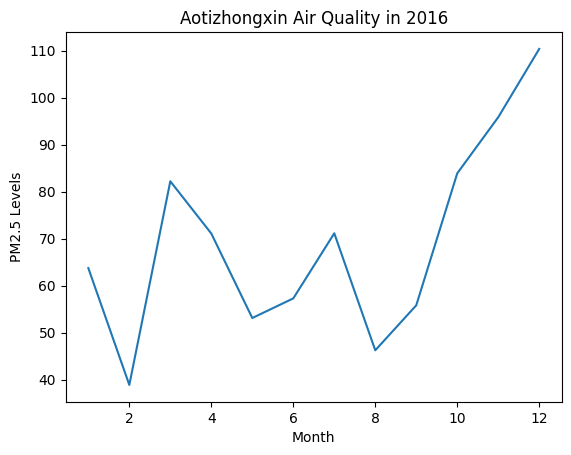

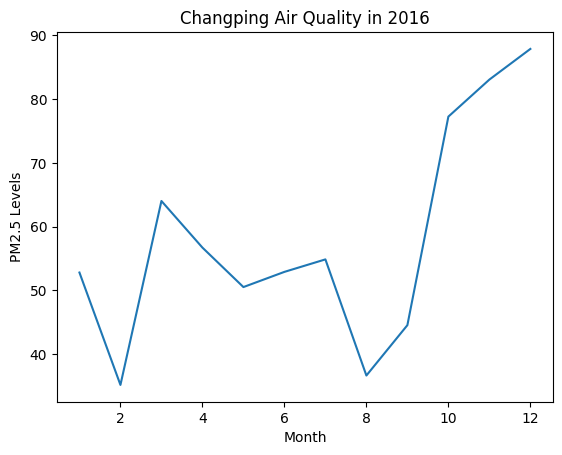

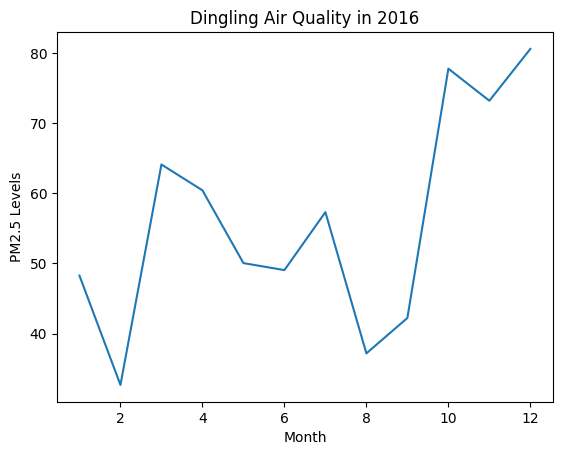

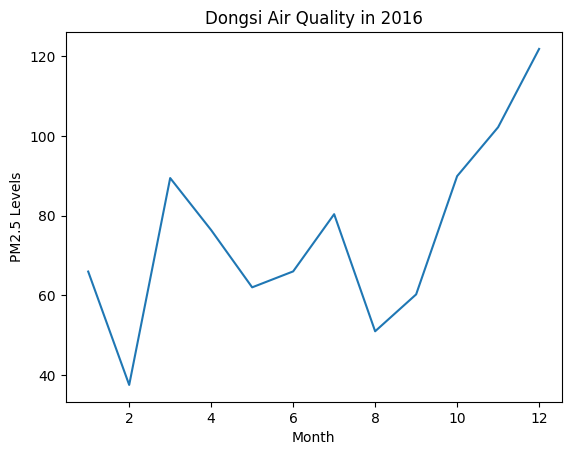

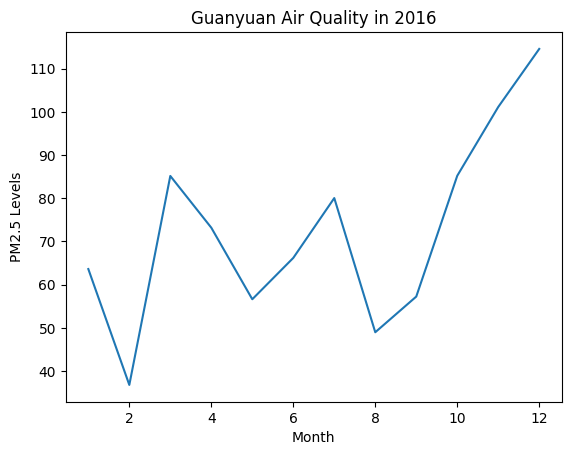

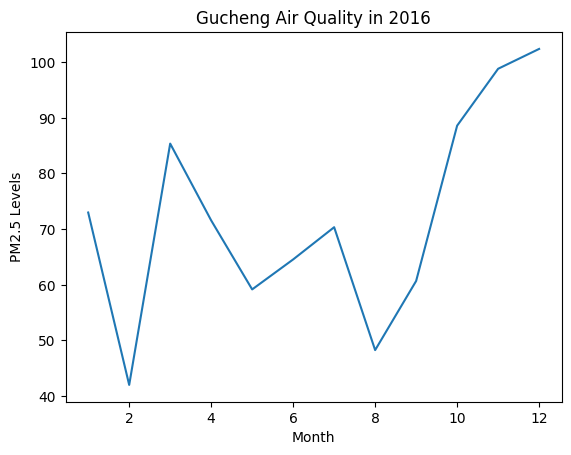

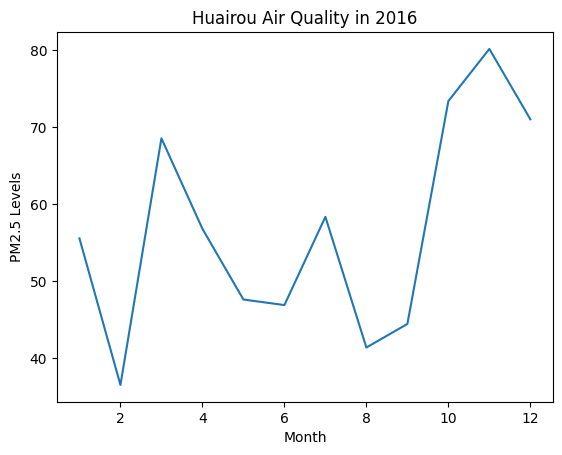

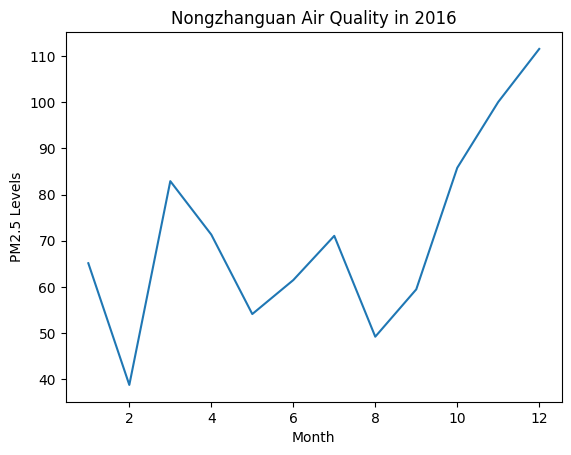

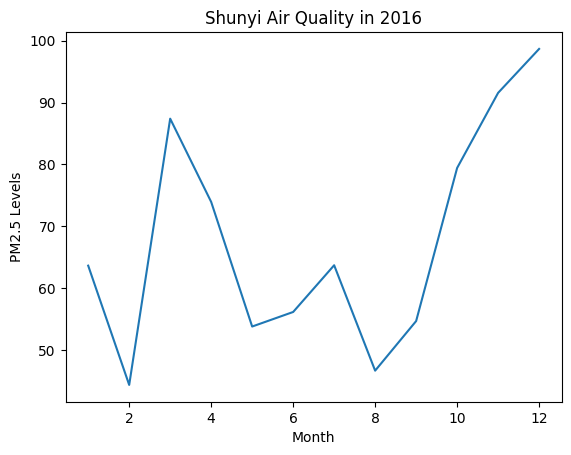

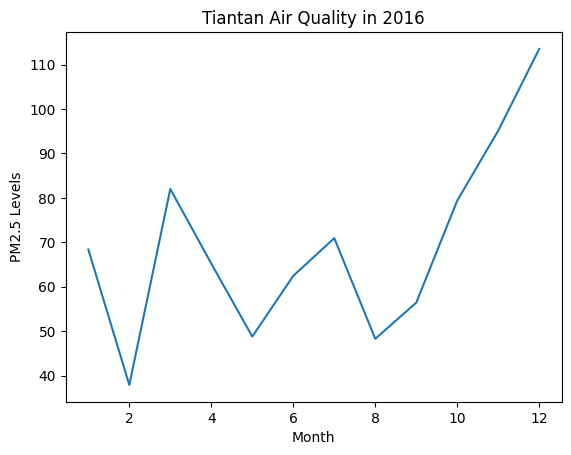

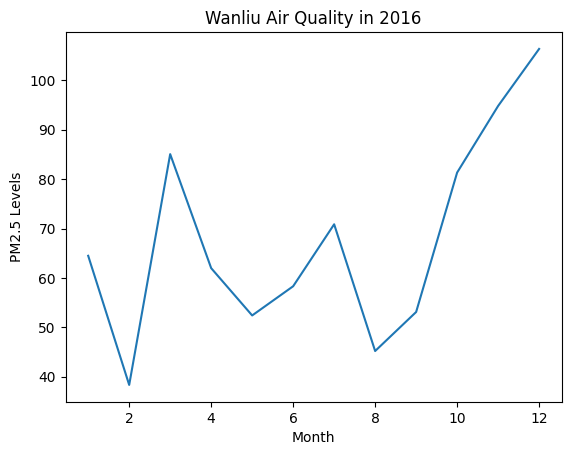

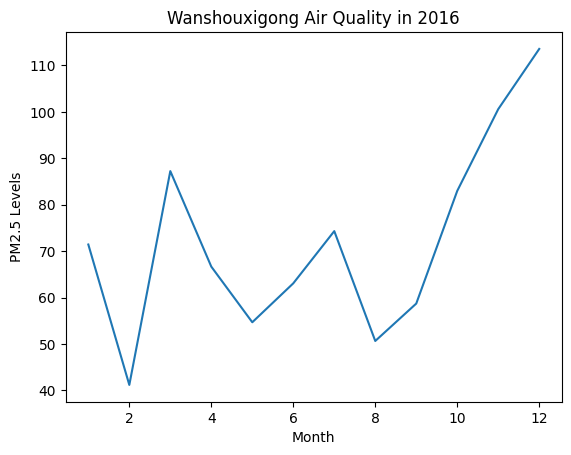

In [100]:
for name in names:
    df = df_dict[name]

    observe = df.groupby(by=['year', 'month']).agg({
        'PM2.5': 'mean',
        'PM10': 'mean'
    }).reset_index()
    
    plt.plot(observe.loc[observe['year'] == 2016, 'month'], observe.loc[observe['year'] == 2016, 'PM2.5'])
    plt.xlabel('Month')
    plt.ylabel('PM2.5 Levels')
    plt.title(name + " Air Quality in 2016")
    plt.show()

**Insight:**
- Dari grafik setiap daerah yang mirip satu sama lain, dapat diambil kesimpulan bahwa kualitas udara cukup merata
- Pola kualitas udara di setiap daerah pun sama, sama-sama rendah di awal tahun lalu naik di akhir tahun

### Pertanyaan 2: Apa Hubungan Antara Kualitas Udara dengan Temperature?

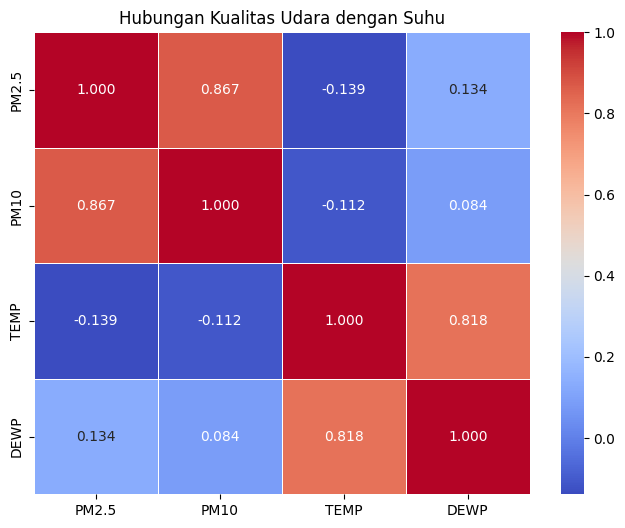

In [102]:
target = ["PM2.5", "PM10", "TEMP", "DEWP"]

correlation_matrix = df[target].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.3f')

plt.title('Hubungan Kualitas Udara dengan Suhu')
plt.show()

**Insight:**
- Walau kualitas udara mempengaruhi titik embun, namun angka korelasinya cukup kecil, yaitu mendekati 0. Sehingga kualitas udara hampir tidak mempengaruhi titik embun.
- Kualitas udara tidak mempengaruhi suhu dan titik embun

### Pertanyaan 3: Bagaimana Unsur Pollutant Dapat Mempengaruhi Kualitas Udara?

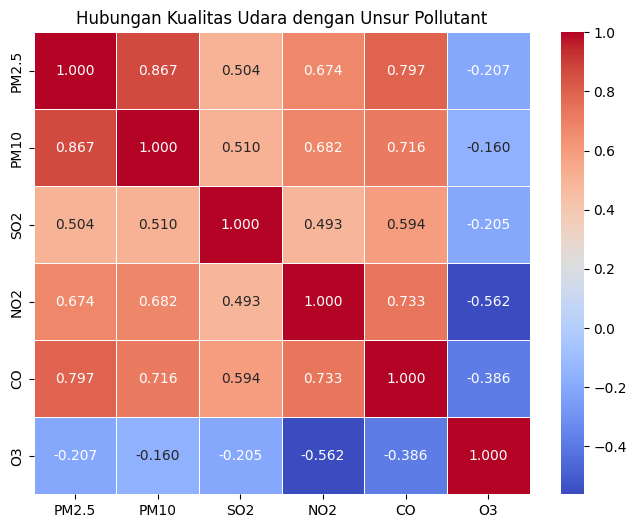

In [105]:
target = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

correlation_matrix = df[target].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', linewidths=.5, fmt='.3f')

plt.title('Hubungan Kualitas Udara dengan Unsur Pollutant')
plt.show()

**Insight:**
- Semakin tinggi unsur pollutant yang ada, semakin buruk kualitas udara yang dihirup
- Akan tetapi, lapisan ozon (03) tidak mempengaruhi kualitas udara

### Pertanyaan 4 : Apa Perbedaan Kualitas Udara Pada Malam Hari dan Siang Hari?

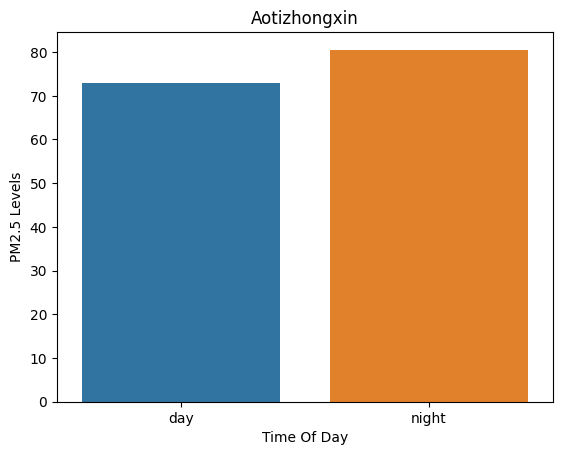

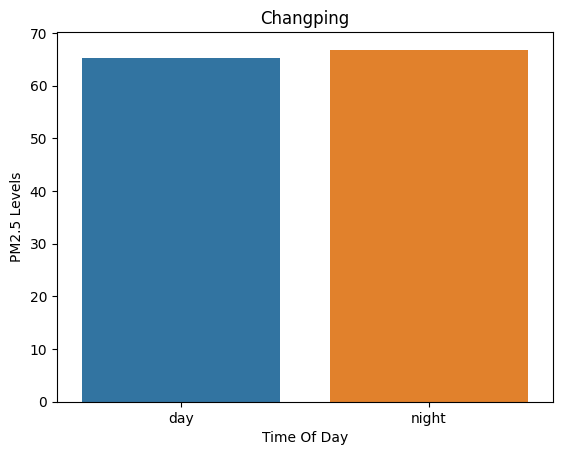

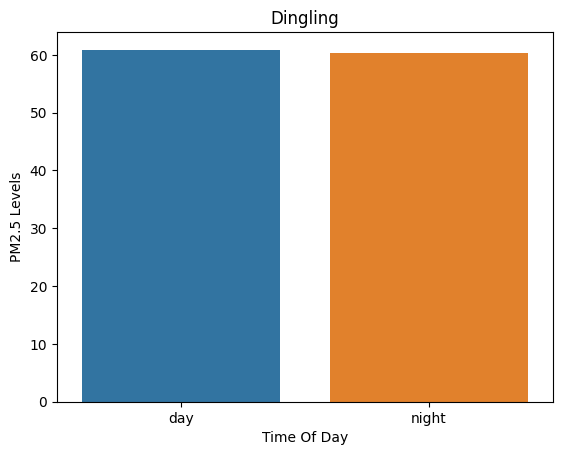

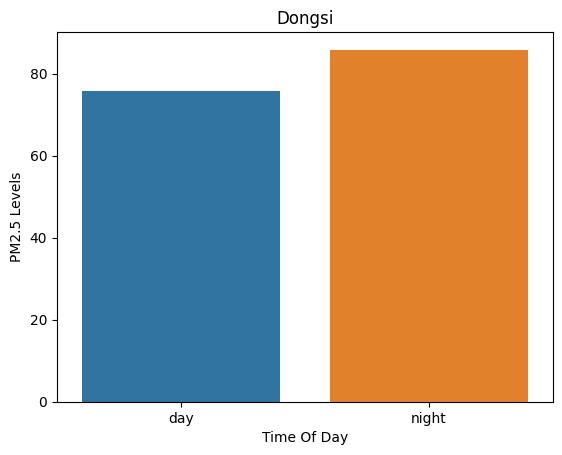

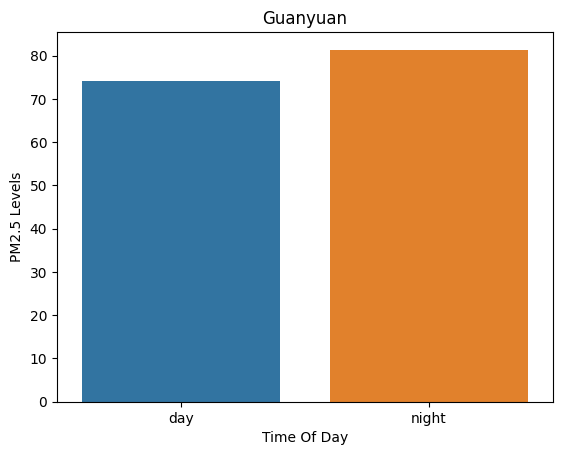

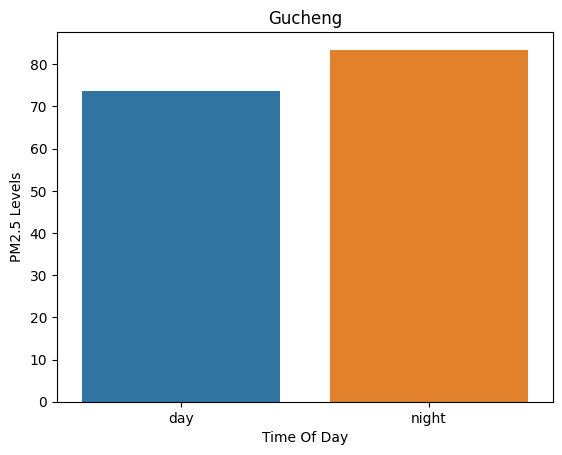

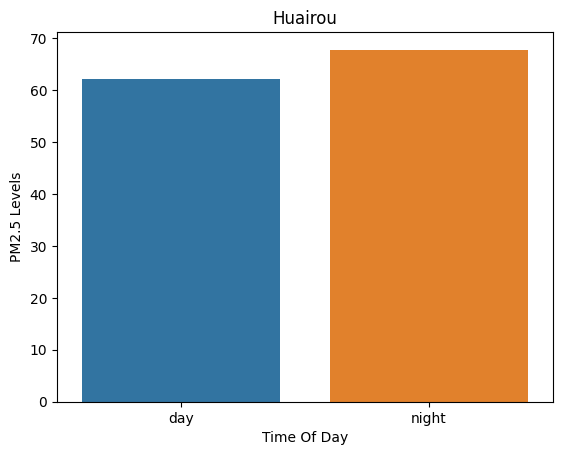

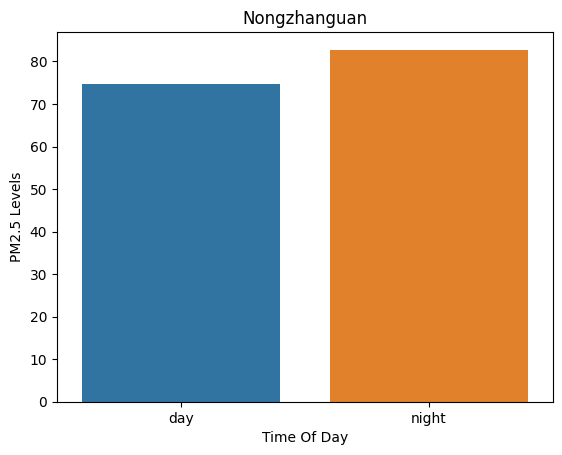

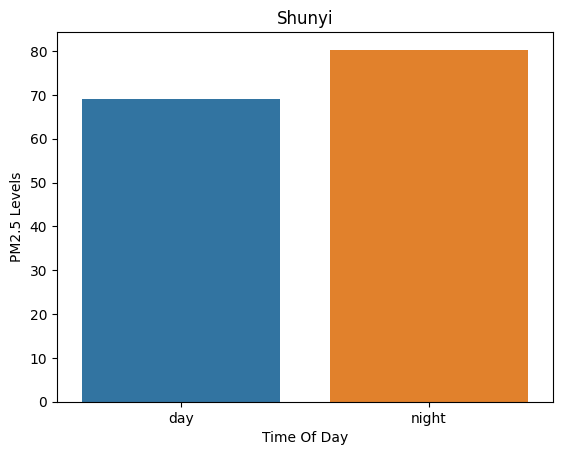

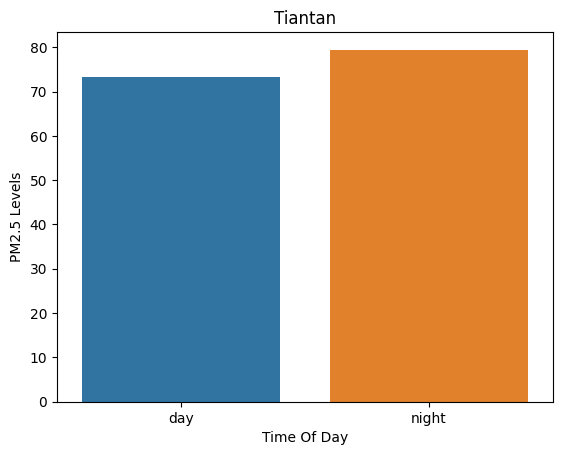

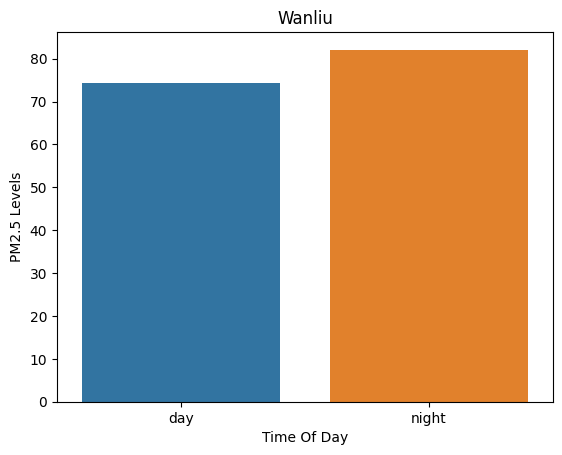

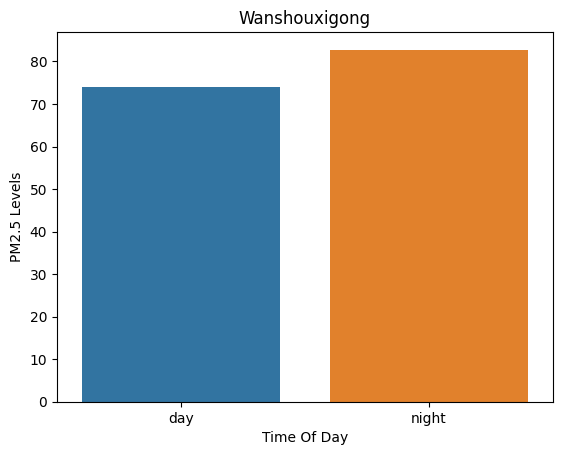

In [111]:
for name in names:
    df = df_dict[name]

    observe = df.groupby(by=['year', 'month', 'day', 'hour']).agg({
        'PM2.5': 'mean',
        'PM10': 'mean'
    }).reset_index()

    observe['time_of_day'] = observe['hour'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')
    
    day_night_comparison = observe.groupby('time_of_day').agg({
        'PM2.5': 'mean',
        'PM10': 'mean'
    }).reset_index()
    
    sns.barplot(data=day_night_comparison, x="time_of_day", y="PM2.5", hue="time_of_day")
    plt.title(name)
    plt.xlabel('Time Of Day')
    plt.ylabel('PM2.5 Levels')
    plt.show()

**Insight:**
- Dari grafik, dapat diambil kesimpulan bahwa di setiap daerah kualitas udara memburuk pada malam hari
- Namun ada dua daerah (Changping dan Dingling) yang kualitas udara pada siang hari maupun malam hari tidak jauh berbeda.

### Pertanyaan 5 : Apakah Curah Hujan yang Tinggi Mempengaruhi Kualitas Udara?

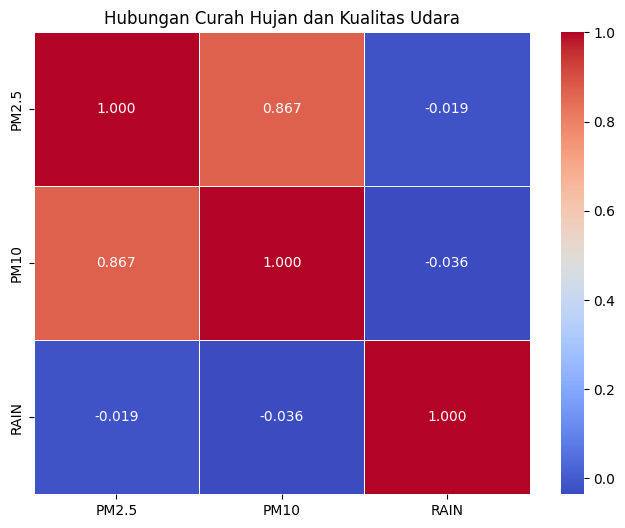

In [107]:
target = ["PM2.5", "PM10", "RAIN"]

correlation_matrix = df[target].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', linewidths=.5, fmt='.3f')

plt.title('Hubungan Curah Hujan dan Kualitas Udara')
plt.show()

**Insight:**
- Curah hujan yang tinggi tidak mempengaruhi kualitas udara, begitupun sebaliknya

## Analisis Lanjutan (Opsional)

## Conclusion

- Kualitas udara pada masing-masing daerah di tahun 2016 memiliki pola yang sama. Di awal tahun, kualitas udara cenderung baik. Di akhir tahun, kualitas udara memburuk secara signifikan.
- Kualitas udara yang buruk tidak mempengaruhi turun naiknya suhu maupun tinggi rendahnya titik embun.
- Unsur pollutant yang tinggi dapat mempengaruhi kualitas udara, dan unsur yang paling mempengaruhi adalah CO (Karbon Monoksida). Namun, lapisan ozon tidak mempengaruhi kualitas udara.
- Pada malam hari, kualitas udara memburuk dibanding di siang hari. Hal ini berlaku untuk kebanyakan daerah kecuali Changping dan Dingling
- Curah hujan yang tinggi tidak mempengaruhi baik buruknya kualitas udara. Sehingga walau udara terasa sejuk saat hujan, unsur pollutant masih tetap ada di udara.